<a href="https://colab.research.google.com/github/EllaGab/PythonDataScienceHandbook/blob/master/Copy_of_Workbook_08_handout_exercise_W2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 8: Tree-Based Methods

Instruction for using Colab: [Here](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm)

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Here, we will continue with the diabetes dataset used in the previous module.

## Bagging

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFubekV4eJCKAP63FN2QGO-eEs8GU20yw3uZBkNhrnEorNBerWC_9_k-OBLnZE9US7T-AX9GmnXMah/pub?gid=1985752445&single=true&output=csv')

In [ ]:
# WARNING: DO NOT RUN THIS CODE IF YOU CAN LOAD THE DATA
# path_diabetes = "/content/drive/My Drive/McGill/session_7/diabetes.csv"
# diabetes_data = pd.read_csv(path_diabetes)

In [ ]:
diabetes_data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [ ]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
diabetes_data.columns = feature_cols + ['Outcome']


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

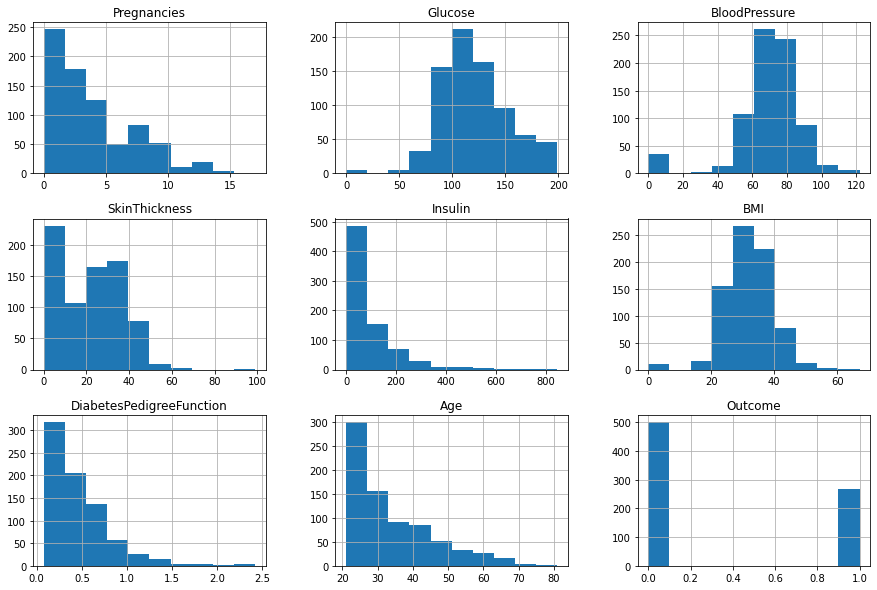

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
diabetes_data.hist()

<font color='red'>

Do you see anything wrong with (some of) the histograms?
</font>

<font color='blue'>
Breakout Room Task # 1 
</font>


In [ ]:
X = diabetes_data[feature_cols] # Features
y = diabetes_data.Outcome # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

**Parameters:** <br>

`criterion: string, optional (default=”gini”)` <br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

`splitter: string, optional (default=”best”)` <br>
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

`max_depth: int or None, optional (default=None)` <br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

`min_samples_split: int, float, optional (default=2)` <br>
The minimum number of samples required to split an internal node:
  + If int, then consider min_samples_split as the minimum number.
  + If float, then `min_samples_split` is a fraction and ceil(`min_samples_split` * `n_samples`) are the minimum number of samples for each split.

`min_samples_leaf : int, float, optional (default=1)` <br>
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
  + If int, then consider `min_samples_leaf` as the minimum number.
  + If float, then `min_samples_leaf` is a fraction and ceil(`min_samples_leaf` * `n_samples`) are the minimum number of samples for each node.

In [ ]:
# BaggingClassifier
dt3 = DecisionTreeClassifier(max_depth=10)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, f1_score, fbeta_score,mean_squared_error, accuracy_score

bag = BaggingClassifier(dt3, n_estimators=100, random_state=1)
bag.fit(X_train, y_train)
y_hat = bag.predict(X_test)
accuracy_score(y_test, y_hat)

0.7835497835497836

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(bag, X_train, y_train, cv=10).mean()

0.7485674353598882

## Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier(n_estimators= 100, random_state=1)
gradboost.fit(X_train, y_train)
y_hat = gradboost.predict(X_test)
accuracy_score(y_test, y_hat)

0.7922077922077922

In [ ]:
cross_val_score(gradboost, X_train, y_train, cv=10).mean()

0.750524109014675

## Bonus - Feature Engineering


In [ ]:
diabetes_data_columns = diabetes_data.columns

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

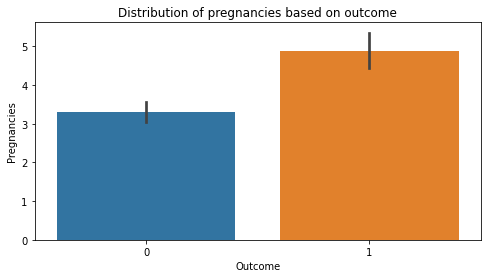

In [ ]:
# Hypothesis 
import seaborn as sns
diabetes_data['Outcome'] = diabetes_data['Outcome'].astype('category')
plt.figure(figsize=(8,4))
plt.tight_layout()
sns.barplot(y='Pregnancies', x='Outcome', data=diabetes_data)
plt.title('Distribution of pregnancies based on outcome')
plt.show()

<font color='red'>What are the 'line' on each bar?</font> 

Check documentation: 
[seaborn barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)



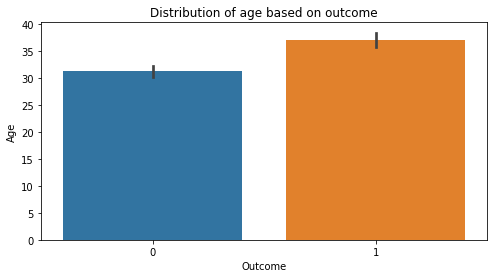

In [ ]:
plt.figure(figsize=(8,4))
plt.tight_layout()
sns.barplot(y='Age', x='Outcome', data=diabetes_data)
plt.title('Distribution of age based on outcome')
plt.show()

In [ ]:
diabetes_data_1 = diabetes_data[diabetes_data['Outcome'] == 1]

In [ ]:
diabetes_average_pregnancies = diabetes_data_1['Pregnancies'].sum()/diabetes_data_1.shape[0]

diabetes_average_age = diabetes_data_1['Age'].sum()/diabetes_data_1.shape[0]

print("In average, people with diabetes have {} pregrancies.".format(diabetes_average_pregnancies))

In average, people with diabetes have 4.865671641791045 pregrancies.


In [ ]:
Diff_DiabPregs = diabetes_data.loc[:,'Pregnancies'] - diabetes_average_pregnancies
Diff_DiabAge = diabetes_data.loc[:,'Age'] - diabetes_average_age

In [ ]:
result = pd.concat([Diff_DiabPregs, Diff_DiabAge, diabetes_data], axis=1, sort=False)

In [ ]:
result.head()

,Pregnancies,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.134328,12.932836,6,148,72,35,0,33.6,0.627,50,1
1,-3.865672,-6.067164,1,85,66,29,0,26.6,0.351,31,0
2,3.134328,-5.067164,8,183,64,0,0,23.3,0.672,32,1
3,-3.865672,-16.067164,1,89,66,23,94,28.1,0.167,21,0
4,-4.865672,-4.067164,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
result.columns = ['Diff_DiabPregs'] + ['Diff_DiabAge'] + list(diabetes_data_columns)

In [ ]:
result.head()

,Diff_DiabPregs,Diff_DiabAge,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.134328,12.932836,6,148,72,35,0,33.6,0.627,50,1
1,-3.865672,-6.067164,1,85,66,29,0,26.6,0.351,31,0
2,3.134328,-5.067164,8,183,64,0,0,23.3,0.672,32,1
3,-3.865672,-16.067164,1,89,66,23,94,28.1,0.167,21,0
4,-4.865672,-4.067164,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
result.dtypes

Diff_DiabPregs               float64
Diff_DiabAge                 float64
Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [ ]:
result['Outcome'] = result['Outcome'].astype(int) 

In [ ]:
#feature_cols = ['Diff_DiabPregs', 'Diff_DiabAge', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
feature_cols = ['Diff_DiabPregs', 'Diff_DiabAge', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


X = result[feature_cols] # Features
y = result.Outcome # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier(n_estimators= 100, random_state=1)
gradboost.fit(X_train, y_train)
y_hat = gradboost.predict(X_test)
accuracy_score(y_test, y_hat)

0.7965367965367965

In [ ]:
cross_val_score(gradboost, X_train, y_train, cv=10).mean()

0.7542278127183788

## Random Forests

In [ ]:
#uploaded = files.upload()

In [ ]:
# spam= pd.read_csv('spamdata.csv')
spam = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRnL0z3Jb8p3gGv4SSTvZ565DPI_iwhdI5wT8YTPLV0RTQpndeBLqbFvg4FYx_KS9-_vYNYOsFGn7ru/pub?gid=853561830&single=true&output=csv')

In [ ]:
# WARNING: DO NOT RUN THIS CODE IF YOU CAN LOAD THE DATA
# path_diabetes = "/content/drive/My Drive/McGill/session_7/diabetes.csv"
# diabetes_data = pd.read_csv(path_diabetes)

In [ ]:
spam.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,parentheses,backet,exclamation,dollar,sharp,length_average,length_longest,length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
spam.dtypes

make              float64
address           float64
all               float64
3d                float64
our               float64
over              float64
remove            float64
internet          float64
order             float64
mail              float64
receive           float64
will              float64
people            float64
report            float64
addresses         float64
free              float64
business          float64
email             float64
you               float64
credit            float64
your              float64
fon               float64
zeros             float64
money             float64
hp                float64
hpl               float64
george            float64
650               float64
lab               float64
labs              float64
telnet            float64
857               float64
data              float64
415               float64
85                float64
technology        float64
1999              float64
parts             float64
pm          

In [ ]:
spam.describe(include='all')

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,parentheses,backet,exclamation,dollar,sharp,length_average,length_longest,length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
X = spam.values[:,:57]
y = spam.values[:,57]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)


Random forests is one of the powerful classification tools. Computations for moderate number of samples is rather fast. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

classification_tree_spam = DecisionTreeClassifier(max_depth = 10)

We will start with a review of ordinary bagging trees:

`sklearn.ensemble.BaggingClassifier()`

**Parameters**

`base_estimator`: object or None, optional (default=None)<br>
The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a decision tree.

`n_estimators` :int, optional (default=10)<br>
The number of base estimators in the ensemble.

`max_samples`: int or float, optional (default=1.0)<br>
The number of samples to draw from X to train each base estimator.
  + If int, then draw max_samples samples.
  + If float, then draw max_samples * X.shape[0] samples.

`max_features`: int or float, optional (default=1.0)<br>
The number of features to draw from X to train each base estimator.
   + If int, then draw max_features features.
   + If float, then draw max_features * X.shape[1] features.
   
`bootstrap`: boolean, optional (default=True)<br>
Whether samples are drawn with replacement. If False, sampling without replacement is performed.

`bootstrap_features`: boolean, optional (default=False) <br>
Whether features are drawn with replacement.

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(classification_tree_spam, n_estimators=100, random_state=1)
bag.fit(X_train, y_train)

y_bag_train = bag.predict(X_train)
print(accuracy_score(y_train, y_bag_train))
print(f1_score(y_train, y_bag_train, average="macro"))
print(precision_score(y_train, y_bag_train, average="macro"))   # "macro" ---> does not take into account imbalance
print(recall_score(y_train, y_bag_train, average="macro")) 

0.9692934782608695
0.9676098702969409
0.9723751995784274
0.9636853703850107


In [ ]:
print(f1_score(y_train, y_bag_train, average="weighted"))


0.9691510036894286


In [ ]:
y_bag_test = bag.predict(X_test)
print(accuracy_score(y_test, y_bag_test))
print(f1_score(y_test, y_bag_test, average="macro"))
print(precision_score(y_test, y_bag_test, average="macro"))   # "macro" ---> does not take into account imbalance
print(recall_score(y_test, y_bag_test, average="macro")) 

0.9446254071661238
0.9410102517152126
0.9469093406593407
0.9362819595923476


Now, let us focus on the random forests:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
rf.fit(X_train, y_train)
y_rf_train = rf.predict(X_train)

print(accuracy_score(y_train, y_rf_train))
print(f1_score(y_train, y_rf_train, average="macro"))
print(precision_score(y_train, y_rf_train, average="macro"))   # "macro" ---> does not take into account imbalance
print(recall_score(y_train, y_rf_train, average="macro")) 

0.967391304347826
0.965589885670525
0.9705734175190407
0.9615186971302079


In [ ]:
y_rf_test = rf.predict(X_test)
print(accuracy_score(y_test, y_rf_test))
print(f1_score(y_test, y_rf_test, average="macro"))
print(precision_score(y_test, y_rf_test, average="macro"))   # "macro" ---> does not take into account imbalance
print(recall_score(y_test, y_rf_test, average="macro")) 

0.9500542888165038
0.9468239464197854
0.9524587415145727
0.9422566899100066


### Tuning the Depth of the Trees

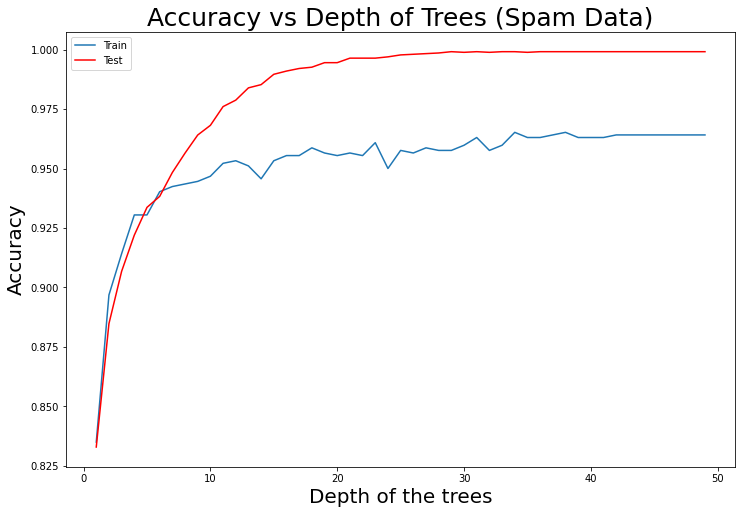

In [ ]:
figsize = plt.figure(figsize = (12,8))
# Initialize the accuracy_score vector
acc = []              # test accuracy
acc_train = []        # train accuracy
depth = np.arange(1, 50)
# Calculate accuracy score on the test set for different depths of the trees
for i in depth:
    # Fit the Regression Tree
    dt = RandomForestClassifier(n_estimators=25, max_depth=i, random_state=1)
    dt.fit(X_train,y_train)
    # Predict on the test set
    y_pred = dt.predict(X_test)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)  
    acc.append(score)
    acc_train.append(accuracy_score(y_train, dt.predict(X_train)))  
# Plot results    
plot = plt.plot(depth, acc, '-', depth, acc_train, 'r')
xlab = plt.xlabel('Depth of the trees', fontsize = 20)
ylab = plt.ylabel('Accuracy', fontsize = 20)
plt.legend(['Train', 'Test'])
title = plt.title('Accuracy vs Depth of Trees (Spam Data)', fontsize = 25);

In [ ]:
print("The best depth of the trees is ", np.argmax(acc)+1, " with accuracy of ", np.amax(acc))


The best depth of the trees is  34  with accuracy of  0.9652551574375678


# Breakout room exercise


1. Load '**wine_255.csv**' dataset on mycourses: mycourses\Content\Data\wine_255.csv
2. You will be working with all the columns in the dataset.

3. Print out the first 10 records and last 5 records/rows of your dataframe.

4. Display some statistics associated with the data.
  * Do you notice something wrong? Fix it.
  * Do you have duplicate entries? Use 

    ```
    pandas - drop_duplicates
    ```
    [documentation - drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

  * How many duplicate entries did you notice?

5. After making proper modification, generate stats associated with all the columns.

6. [Optional] Partition data into two parts : train and test (ratio: 80:20).

7. Train a Decision Tree Classifier model with the target variable being: '**quality_category**'

8. Check model performance on the data: Confusion Matrix, Classification Report.

9. Train a Random Forest Classifier model with the target variable being: '**quality_category**'

10. Also train a bagging classifier with Logistic regression as the base estimator.

11. Perform k- fold CV for hyperparameter search with following parameters:

  * number of estimators: 10, 20, 50
  * min_samples_split: 2, 3, 5
  * criterion: 'gini', 'entropy'
  * max_leaf_node: 4, 6, 8

Instead of tuning all hyperparameters, just choose any two and perform search.

* Note: Step 11 can be performed with either 'Decison Tree' or 'Random Forest' classifier. Not all the parameters will be valid. Check documentation and tune accordingly.

* If time permits, check out [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [ ]:
import pandas as pd

#df = pd.read_csv('./data/wine_255.csv')

df = pd.read_csv("wine_255.csv")

df.head(10)
df

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,2
1,1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,2
2,2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,2
3,3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
4,4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,2
6459,6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,3
6460,6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
6461,6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,3


In [ ]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,3255.125793,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,2.177626
std,1869.906597,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.858450
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,1639.500000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,2.000000
50%,3257.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,2.000000
75%,4872.500000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,3.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,4.000000


In [ ]:
df_clean = df.drop('Unnamed: 0', axis=1).drop_duplicates()
df_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
count,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154,2.199245
std,1.320690,0.168237,0.147112,4.500641,0.036901,17.827151,56.787187,0.002969,0.160155,0.149851,1.186533,0.862123
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,2.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000,2.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996780,3.330000,0.600000,11.400000,3.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,4.000000


In [ ]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df_clean.drop('quality_category', axis=1), drop_first=True)
y = df_clean['quality_category']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier(random_state = 1)
tr.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the response for test dataset
y_pred = tr.predict(test_X)
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

[[  5  12   8   3   1]
 [  7  68  87  13   4]
 [ 15  73 245 121  13]
 [  5  27 120 166  21]
 [  0   5  16  18   6]]
              precision    recall  f1-score   support

           0       0.16      0.17      0.16        29
           1       0.37      0.38      0.37       179
           2       0.51      0.52      0.52       467
           3       0.52      0.49      0.50       339
           4       0.13      0.13      0.13        45

    accuracy                           0.46      1059
   macro avg       0.34      0.34      0.34      1059
weighted avg       0.46      0.46      0.46      1059



In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 

rfc = RandomForestClassifier(random_state=1)
rfc.fit(train_X, train_y)




RandomForestClassifier(random_state=1)

In [ ]:
rfc.score(test_X, test_y)

0.550519357884797

In [ ]:
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression(random_state=1)
# bc = BaggingClassifier(logreg)
# bc.fit(train_X, train_y)

Perform k- fold CV for hyperparameter search with following parameters:

number of estimators: 10, 20, 50
min_samples_split: 2, 3, 5
criterion: 'gini', 'entropy'
max_leaf_node: 4, 6, 8

In [ ]:
  parameters = {
      "n_estimators": [1000],
      "min_samples_split": [50],
      "criterion": ['gini'],
      "max_leaf_nodes": [32]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc_1 = RandomForestClassifier(random_state=0)

In [ ]:
grid_search = GridSearchCV(estimator=rfc_1,
                           param_grid = parameters,
                           scoring= 'accuracy',
                           cv = 5)

In [ ]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini'], 'max_leaf_nodes': [32],
                         'min_samples_split': [50], 'n_estimators': [1000]},
             scoring='accuracy')

In [ ]:
print('GridSearch CV best score: {:.3f}\n\n'.format(grid_search.best_score_))
print('GridSearch CV best params: {:.3f}\n\n', (grid_search.best_params_))
print('GridSearch CV best estimator: {:.3f}\n\n', (grid_search.best_estimator_))

GridSearch CV best score: 0.551


GridSearch CV best params: {:.3f}

 {'criterion': 'gini', 'max_leaf_nodes': 32, 'min_samples_split': 50, 'n_estimators': 1000}
GridSearch CV best estimator: {:.3f}

 RandomForestClassifier(max_leaf_nodes=32, min_samples_split=50,
                       n_estimators=1000, random_state=0)


In [ ]:
print('GridSearch CV score on test: {:.3f}\n\n'.format(grid_search.score(test_X, test_y)))

GridSearch CV score on test: 0.550


